In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json file

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"drishtijaiswal","key":"a3ae798b1e15a2927665a614576f67c3"}'}

In [4]:
import os
os.makedirs('/root/.kaggle', exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d yamaerenay/spotify-dataset-1921-2020-160k-tracks

Dataset URL: https://www.kaggle.com/datasets/yamaerenay/spotify-dataset-1921-2020-160k-tracks
License(s): Community Data License Agreement - Sharing - Version 1.0


In [6]:
!unzip -o spotify-dataset-1921-2020-160k-tracks.zip

Archive:  spotify-dataset-1921-2020-160k-tracks.zip
  inflating: data.csv                
  inflating: data_by_artist.csv      
  inflating: data_by_genres.csv      
  inflating: data_by_year.csv        
  inflating: data_w_genres.csv       


In [7]:
import pandas as pd
df = pd.read_csv('data.csv')  # Adjust the filename if it's different (File names did not need to be adjusted)

In [9]:
# Check the first few rows
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [10]:
# Overview of column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [ ]:
# @title Checking for Duplicates


In [14]:
# Group by song name and artist to check how often they repeat
dupes_by_name_artist = df.groupby(['name', 'artists']).size().reset_index(name='count')
dupes_by_name_artist = dupes_by_name_artist[dupes_by_name_artist['count'] > 1]

print(f"Potential duplicates by name + artist: {dupes_by_name_artist.shape[0]}")
dupes_by_name_artist.head(10)


Potential duplicates by name + artist: 11033


,name,artists,count
3,"""40"" - Remastered 2008",['U2'],2
10,"""Carmen Fantasie"", by Franz Waxman, based on t...","['Georges Bizet', 'Jascha Heifetz', 'Donald Vo...",2
45,"""The Take Over, The Breaks Over""",['Fall Out Boy'],2
76,$outh $ide $uicide,"['$uicideBoy$', 'Pouya']",2
79,&burn (with Vince Staples),"['Billie Eilish', 'Vince Staples']",2
83,'39 - Remastered 2011,['Queen'],2
89,'97 Bonnie & Clyde,['Eminem'],2
109,'Cause I Love You,['Johnny Cash'],2
113,'Cross the Breeze (Album Version),['Sonic Youth'],2
155,'Round Midnight,['Miles Davis'],5


In [15]:
# Find all entries for Lewis Capaldi
df[df['artists'].str.contains("Lewis Capaldi", case=False)].sort_values(by='name')


,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
19445,0.183,2019,0.604,['Lewis Capaldi'],0.459,215107,0.575,0,7ce20yLkzuXXLUhzIDoZih,0.0,3,0.0885,-4.858,1,Before You Go,86,2019-11-19,0.0573,111.881
19464,0.183,2019,0.604,['Lewis Capaldi'],0.459,215107,0.575,0,2gMXnyrvIjhVBUZwvLZDMP,0.0,3,0.0885,-4.858,1,Before You Go,86,2019-11-22,0.0573,111.881
108720,0.183,2020,0.608,['Lewis Capaldi'],0.459,215107,0.574,0,5vf3c9NMHKUv7fA0PrKviG,0.0,3,0.0885,-4.857,1,Before You Go,3,2020-11-23,0.0577,111.881
108719,0.183,2020,0.608,['Lewis Capaldi'],0.459,215107,0.574,0,3trhgJDf3PKTR54tfAawv3,0.0,3,0.0885,-4.857,1,Before You Go,1,2020-11-20,0.0577,111.881
108716,0.183,2020,0.608,['Lewis Capaldi'],0.459,215107,0.574,0,19iKOTrRqsiJYD752JrG6e,0.0,3,0.0885,-4.857,1,Before You Go,2,2020-11-20,0.0577,111.881
19468,0.361,2019,0.946,['Lewis Capaldi'],0.736,220492,0.308,0,4Of7rzpRpV1mWRbhp5rAqG,0.0,4,0.1860,-7.830,1,Bruises,84,2019-05-17,0.0677,111.202
108715,0.321,2020,0.944,['Lewis Capaldi'],0.746,220200,0.322,0,4PplkClWZAV9wtMGasfCvw,0.0,1,0.1970,-7.922,0,Bruises,22,2020-11-20,0.0798,110.774
57079,0.364,2019,0.873,['Lewis Capaldi'],0.646,210863,0.355,0,12OLyHDxt6dqlAybSPFBK3,0.0,1,0.1150,-7.119,1,Forever,75,2019-05-17,0.0263,84.988
108615,0.488,2019,0.435,['Lewis Capaldi'],0.722,185658,0.565,0,0pEkK8MqbmGSX7fT8WLMbR,0.0,4,0.1650,-5.848,1,Grace,71,2019-05-17,0.0335,104.483
19498,0.162,2019,0.443,['Lewis Capaldi'],0.688,205687,0.530,0,60iSKGrGazRzICtMjADNSM,0.0,11,0.0995,-5.507,1,Hold Me While You Wait,82,2019-05-17,0.0333,106.958


In [16]:
# Sort by popularity descending so we keep the most popular version first
df_sorted = df.sort_values(by='popularity', ascending=False)

# Drop duplicates based on name + artist, keeping the first (most popular version)
df_deduped = df_sorted.drop_duplicates(subset=['name', 'artists'], keep='first')

print(f"Original shape: {df.shape}")
print(f"After soft deduplication: {df_deduped.shape}")


Original shape: (170653, 19)
After soft deduplication: (157685, 19)


In [ ]:
# @title Normalizing the Value of Audio Features


In [17]:
from sklearn.preprocessing import MinMaxScaler

# Define features to use in similarity comparisons
feature_cols = ['valence', 'energy', 'danceability', 'acousticness', 'instrumentalness',
                'liveness', 'speechiness', 'tempo']

# Normalize them using MinMaxScaler
scaler = MinMaxScaler()
df_deduped[feature_cols] = scaler.fit_transform(df_deduped[feature_cols])

# Just to verify:
df_deduped[feature_cols].describe()


<ipython-input-17-bde0db176d6c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_deduped[feature_cols] = scaler.fit_transform(df_deduped[feature_cols])


,valence,energy,danceability,acousticness,instrumentalness,liveness,speechiness,tempo
count,157685.000000,157685.000000,157685.000000,157685.000000,157685.000000,157685.000000,157685.000000,157685.000000
mean,0.527533,0.480777,0.543265,0.506231,0.167925,0.206756,0.104052,0.479697
std,0.263257,0.267678,0.178515,0.377574,0.313847,0.175531,0.172875,0.126303
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.316000,0.254000,0.419028,0.103414,0.000000,0.099000,0.036082,0.382975
50%,0.538000,0.468000,0.553644,0.524096,0.000225,0.136000,0.046701,0.471190
75%,0.746000,0.701000,0.676113,0.897590,0.106000,0.263000,0.079381,0.556584
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# @title Create Helper Matrix for Fast Cosine Similarity


In [18]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Create a NumPy matrix for fast similarity lookup
feature_matrix = df_deduped[feature_cols].values

# Reset index for easier tracking of song IDs
df_deduped = df_deduped.reset_index(drop=True)

# Tracking variables
played_indices = []
skipped_indices = []


In [ ]:
# @title Implemeting the Logic and Recommending Songs Based on Recent Plays


In [19]:
def recommend_songs(n_recent=10, top_k=5):
    if len(played_indices) == 0:
        print("No songs played yet.")
        return []

    # Use only the last `n_recent` played songs
    recent_indices = played_indices[-n_recent:] if len(played_indices) >= n_recent else played_indices

    # Calculate average feature vector
    avg_vector = np.mean(feature_matrix[recent_indices], axis=0).reshape(1, -1)

    # Find all unseen songs
    seen_indices = set(played_indices + skipped_indices)
    unseen_indices = [i for i in range(len(df_deduped)) if i not in seen_indices]

    if not unseen_indices:
        print("No unseen songs left.")
        return []

    unseen_matrix = feature_matrix[unseen_indices]

    # Compute cosine similarity
    similarities = cosine_similarity(avg_vector, unseen_matrix)[0]

    # Get top K matches
    top_indices = np.argsort(similarities)[-top_k:][::-1]
    recommended_song_indices = [unseen_indices[i] for i in top_indices]

    return df_deduped.loc[recommended_song_indices]


In [21]:
# Show which songs were played (used for computing recommendation)
df_deduped.loc[played_indices][['name', 'artists', 'popularity']]


,name,artists,popularity
13256,Salvatore,['Lana Del Rey'],62
71975,Shadows In The Moonlight,['Anne Murray'],36
18699,Kiss Me In The Dark,['Randy Rogers Band'],58


In [20]:
# Simulate playing 3 random songs
played_indices += list(df_deduped.sample(3).index)

# Get recommendations
recommendations = recommend_songs()
recommendations[['name', 'artists', 'popularity']]


,name,artists,popularity
4506,It's A Great Day To Be Alive,['Travis Tritt'],70
91238,Moving Target,['The Outfield'],28
6473,Ends of the Earth,['Lord Huron'],68
36514,Prop Me Up Beside the Jukebox (If I Die),['Joe Diffie'],50
139717,"Nacchite Ye Panaina (From ""Dohchay"")",['Arijit Singh'],0


In [ ]:
# @title Checking the Logic with Custom Input


In [22]:
def recommend_from_custom_input(played_ids, skipped_ids=None, top_k=5):
    played_indices = df_deduped[df_deduped['id'].isin(played_ids)].index.tolist()
    if skipped_ids:
        skipped_indices = df_deduped[df_deduped['id'].isin(skipped_ids)].index.tolist()
    else:
        skipped_indices = []

    # Compute average feature vector of played songs
    avg_vector = np.mean(feature_matrix[played_indices], axis=0).reshape(1, -1)

    # Remove seen songs
    seen = set(played_indices + skipped_indices)
    unseen_indices = [i for i in range(len(df_deduped)) if i not in seen]

    # Compute cosine similarity
    similarities = cosine_similarity(avg_vector, feature_matrix[unseen_indices])[0]
    top_indices = np.argsort(similarities)[-top_k:][::-1]
    recommended_indices = [unseen_indices[i] for i in top_indices]

    return df_deduped.loc[recommended_indices][['id', 'name', 'artists', 'popularity']]


In [27]:
# Define the function first
def get_song_ids_strict(matches):
    ids = []
    for title, artist in matches:
        result = df_deduped[
            df_deduped['name'].str.contains(title, case=False, na=False) &
            df_deduped['artists'].str.contains(artist, case=False, na=False)
        ]
        if not result.empty:
            print(f"\nMatch found for '{title}' by '{artist}':")
            display(result[['id', 'name', 'artists', 'popularity']].head(1))
            ids.append(result.iloc[0]['id'])
        else:
            print(f"\nNo match found for '{title}' by '{artist}'")
    return ids

# Now declare your test inputs
played_songs_exact = [
    ("There She Goes", "The La's"),
    ("Someone You Loved", "Lewis Capaldi"),
    ("I Won't Give Up", "Jason Mraz"),
    ("FourFiveSeconds", "Rihanna")
]

skipped_songs_exact = [
    ("Yellow", "Coldplay"),
    ("Hotline Bling", "Drake"),
    ("The Monster", "Rihanna")
]

# Now call the function safely
played_ids = get_song_ids_strict(played_songs_exact)
skipped_ids = get_song_ids_strict(skipped_songs_exact)


Match found for 'There She Goes' by 'The La's':


,id,name,artists,popularity
13070,0SMkzFGJOBFDI9KfYD55L0,There She Goes,"[""The La's""]",62



Match found for 'Someone You Loved' by 'Lewis Capaldi':


,id,name,artists,popularity
32,7qEHsqek33rTcFNT9PFqLf,Someone You Loved,['Lewis Capaldi'],91



Match found for 'I Won't Give Up' by 'Jason Mraz':


,id,name,artists,popularity
2834,53QF56cjZA9RTuuMZDrSA6,I Won't Give Up,['Jason Mraz'],73



Match found for 'FourFiveSeconds' by 'Rihanna':


,id,name,artists,popularity
755,78TTtXnFQPzwqlbtbwqN0y,FourFiveSeconds,"['Rihanna', 'Kanye West', 'Paul McCartney']",79



Match found for 'Yellow' by 'Coldplay':


,id,name,artists,popularity
213,3AJwUDP919kvQ9QcozQPxg,Yellow,['Coldplay'],84



Match found for 'Hotline Bling' by 'Drake':


,id,name,artists,popularity
1280,0wwPcA6wtMf6HUMpIRdeP7,Hotline Bling,['Drake'],77



Match found for 'The Monster' by 'Rihanna':


,id,name,artists,popularity
1462,48RrDBpOSSl1aLVCalGl5C,The Monster,"['Eminem', 'Rihanna']",76


In [28]:
# Get recommendations
recommend_from_custom_input(played_ids, skipped_ids, top_k=5)


,id,name,artists,popularity
34472,19MMMKq4LzbTvhOMYccIRd,Waltz for Koop,['Koop'],50
34813,03czT1nVZDRv2JlpY2GxON,The Longer I Run,['Peter Bradley Adams'],50
97551,4GUTmYrZhYAKLP6G2ZUwHZ,Les Boys,['Dire Straits'],26
112887,3jV7xeKd7V5suD6w9qCT2m,Basal Metabolism (Based On How Long Has This B...,['Fred Astaire'],16
19196,4Y8MG7qcAMk7JB7Eebpcvu,Blue Dream,['Jhené Aiko'],58


In [ ]:
# @title Checking Accuracy


In [33]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Define features used in your recommender
feature_cols = ['valence', 'energy', 'danceability', 'acousticness',
                'instrumentalness', 'liveness', 'speechiness', 'tempo']

# Get feature vectors
played_vectors = played_df[feature_cols].values
recommended_vectors = recommended_df[feature_cols].values

# Average vector of played songs
avg_played_vector = np.mean(played_vectors, axis=0).reshape(1, -1)

# Compute similarity of each recommended song to the average played vector
similarities = cosine_similarity(recommended_vectors, avg_played_vector)

# Print similarity for each recommended song
for i, sim in enumerate(similarities):
    print(f"Song {i+1} similarity to played profile: {sim[0]:.4f}")

# Overall average similarity (can treat as "feature-based accuracy")
overall_similarity = np.mean(similarities)
print(f"\nFeature-Based Accuracy Score: {overall_similarity * 100:.2f}%")


Song 1 similarity to played profile: 0.9951
Song 2 similarity to played profile: 0.9975
Song 3 similarity to played profile: 0.9974
Song 4 similarity to played profile: 0.9964
Song 5 similarity to played profile: 0.9956

Feature-Based Accuracy Score: 99.64%


In [30]:
# Get dataframes
played_df = df_deduped[df_deduped['id'].isin(played_ids)]
recommended_df = df_deduped[df_deduped['id'].isin(recommend_from_custom_input(played_ids, skipped_ids)['id'])]
skipped_df = df_deduped[df_deduped['id'].isin(skipped_ids)]


In [31]:
# Define the same feature set you used in your recommender
features_to_compare = ['valence', 'energy', 'danceability', 'acousticness',
                       'instrumentalness', 'liveness', 'speechiness', 'tempo']

# Create a DataFrame with mean values for each group
import pandas as pd

metrics_df = pd.DataFrame({
    'Played': played_df[features_to_compare].mean(),
    'Recommended': recommended_df[features_to_compare].mean(),
    'Skipped': skipped_df[features_to_compare].mean() if not skipped_df.empty else None
})

# Transpose to make it readable
metrics_df = metrics_df.T
metrics_df


,valence,energy,danceability,acousticness,instrumentalness,liveness,speechiness,tempo
Played,0.46175,0.4585,0.557692,0.585567,0.185750,0.12650,0.039072,0.590510
Recommended,0.45180,0.4492,0.540688,0.587349,0.176600,0.10554,0.045897,0.571501
Skipped,0.48700,0.7140,0.708839,0.019234,0.000104,0.13480,0.053162,0.572724


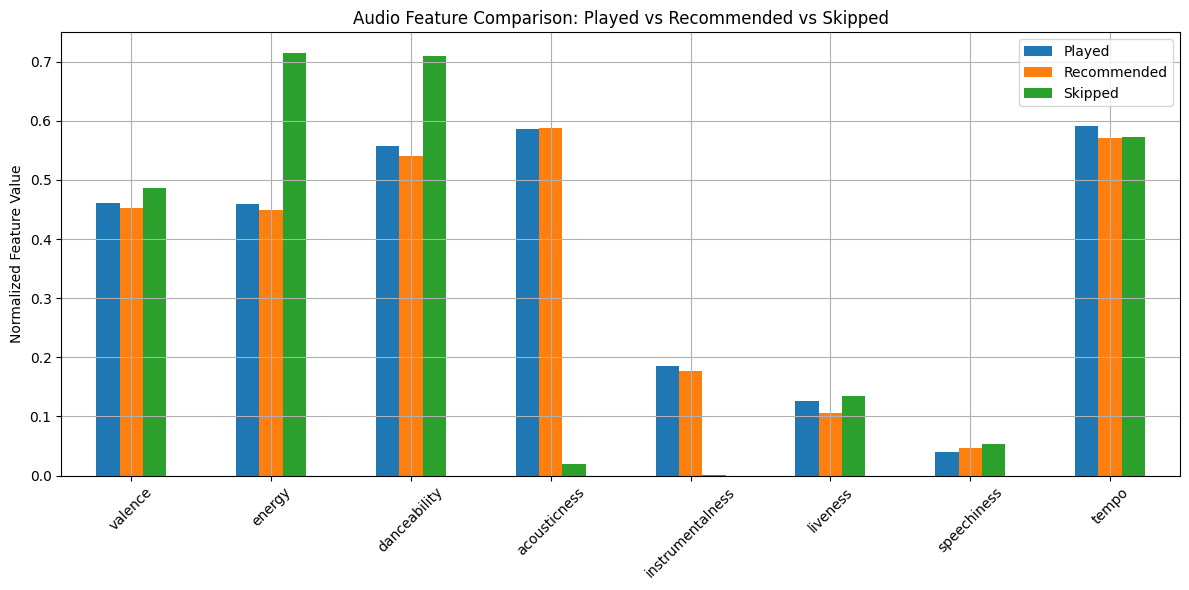

In [32]:
import matplotlib.pyplot as plt

metrics_df.T.plot(kind='bar', figsize=(12, 6))
plt.title('Audio Feature Comparison: Played vs Recommended vs Skipped')
plt.ylabel('Normalized Feature Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
